In [1]:
# Incorporate all likely lines into our plots, even ones the code didn't detect
from astropy.io import ascii
from astroquery.splatalogue import Splatalogue, utils
from astropy import units as u
from astropy import table
from full_spectrum_plot import plot_spectrum, plot_spectrum_line_ids, plot_spectrum_line_ids_final
from spectral_ids import line_ids
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/spectra/'

In [2]:
# Begin by reading in the .csv file we made
every_line = ascii.read('ACES_lines_brick.csv', format='csv')
# Remove rows that are masked
every_line = every_line[~every_line['freq_spw'].mask]
# Group by spectral window and type of spectrum
every_line_by_spectrum = every_line.group_by(['freq_spw','Spectrum type'])

In [3]:
max_ids_87_spw25_L = every_line_by_spectrum.groups[2]
mean_ids_87_spw25_L = every_line_by_spectrum.groups[3]
max_ids_102_spw106_L = every_line_by_spectrum.groups[0]
mean_ids_102_spw106_L = every_line_by_spectrum.groups[1]

There are multiple beams for this spectrum that are being ignored when creating the HDU.


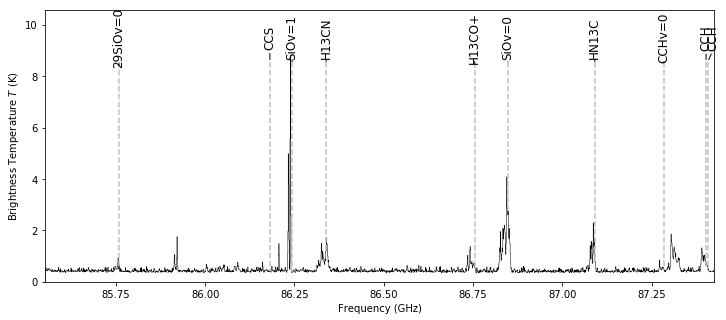

There are multiple beams for this spectrum that are being ignored when creating the HDU.


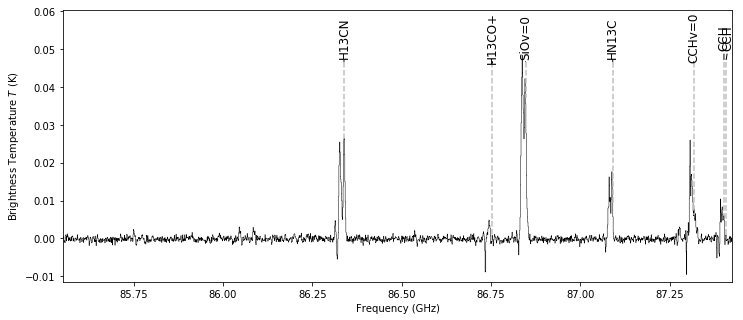

There are multiple beams for this spectrum that are being ignored when creating the HDU.


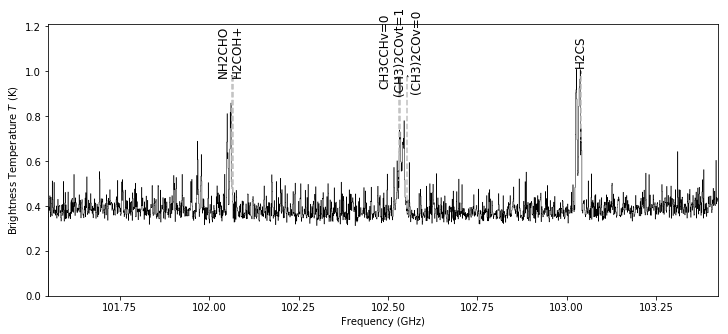

There are multiple beams for this spectrum that are being ignored when creating the HDU.


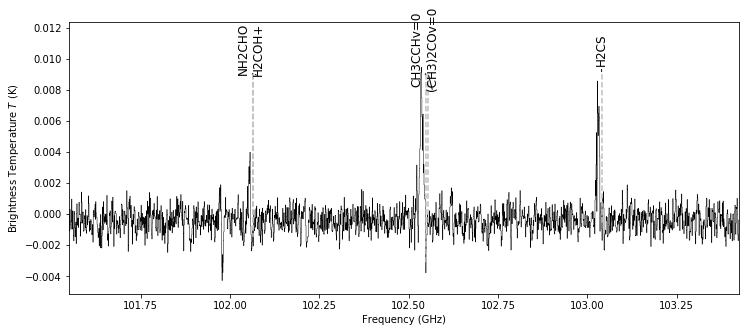

In [4]:
curated_max_ids = [max_ids_87_spw25_L,max_ids_102_spw106_L]
curated_mean_ids = [mean_ids_87_spw25_L,mean_ids_102_spw106_L]
i = 0
for freq_spw in ['87_spw25','102_spw106']:
    max_fn = results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.max.fits'
    mean_fn = results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.mean.fits'
    # Plot lines in max spectrum
    plot_spectrum_line_ids_final(max_fn, curated_max_ids[i], save=True)
    # Plot lines in mean spectrum
    plot_spectrum_line_ids_final(mean_fn, curated_mean_ids[i], save=True)
    i += 1